***NEWS API intergation***

API Call

In [1]:
from newsapi import NewsApiClient
import time
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os

# Load API key from .env
load_dotenv()
newsapi = NewsApiClient(api_key=os.getenv("API_KEY"))

# Master CSV file
master_file = 'updated_news.csv'

# Load existing data if available
if os.path.exists(master_file):
    print(f'📂 Existing file "{master_file}" found. Loading...')
    existing_news = pd.read_csv(master_file)
else:
    print(f'🆕 No existing file found. Starting fresh!')
    existing_news = pd.DataFrame(columns=['link', 'headline', 'category', 'short_description', 'authors', 'date'])

# category to keywords mapping
query_keywords = {
    'TECH': ['technology', 'tech news', 'gadgets', 'AI'],
    'SPORTS': ['sports', 'football', 'cricket', 'NBA'],
    'ENTERTAINMENT': ['movies', 'celebrity', 'music', 'entertainment'],
    'POLITICS': ['politics', 'government', 'elections'],
    'EDUCATION': ['education', 'students', 'schools', 'university'],
    'ENVIRONMENT': ['climate change', 'environment', 'pollution'],
    'SCIENCE': ['science', 'research', 'NASA', 'discovery'],
    'CRIME': ['crime', 'murder', 'theft', 'arrest'],
    'BUSINESS': ['business', 'finance', 'stocks', 'economy'],
    'TRAVEL': ['travel', 'tourism', 'vacation', 'flights'],
    'STYLE & BEAUTY': ['fashion', 'style', 'makeup', 'beauty']
}

news_data = []

# Fetch news for each custom category
for category, keywords in query_keywords.items():
    print(f'\n🔍 Scraping category: {category}')
    for keyword in keywords:
        print(f'   ➤ Using keyword: "{keyword}"')
        try:
            articles = newsapi.get_everything(q=keyword,
                                              language='en',
                                              sort_by='publishedAt',
                                              page_size=20)

            for article in articles.get('articles', []):
                news_data.append({
                    'link': article['url'],
                    'headline': article['title'],
                    'category': category,
                    'short_description': article['description'],
                    'authors': article.get('author', 'Unknown'),
                    'date': article['publishedAt']
                })

        except Exception as e:
            print(f"⚠️ Error fetching keyword '{keyword}' for {category}: {e}")
        time.sleep(1.5) 


new_news_df = pd.DataFrame(news_data)


print('\n Merging new data with existing data...')
combined_news = pd.concat([existing_news, new_news_df], ignore_index=True)


combined_news.drop_duplicates(subset='link', keep='last', inplace=True)

combined_news['category'] = combined_news['category'].str.upper()

combined_news.to_csv(master_file, index=False)
print(f'Master file updated: {master_file}')


filtered_categories = list(query_keywords.keys())
filtered_news = combined_news[combined_news['category'].isin(filtered_categories)]

filtered_file = 'test_data.csv'
filtered_news.to_csv(filtered_file, index=False)
print(f'Filtered news saved to: {filtered_file}')


📂 Existing file "updated_news.csv" found. Loading...

🔍 Scraping category: TECH
   ➤ Using keyword: "technology"
   ➤ Using keyword: "tech news"
   ➤ Using keyword: "gadgets"
   ➤ Using keyword: "AI"

🔍 Scraping category: SPORTS
   ➤ Using keyword: "sports"
   ➤ Using keyword: "football"
   ➤ Using keyword: "cricket"
   ➤ Using keyword: "NBA"

🔍 Scraping category: ENTERTAINMENT
   ➤ Using keyword: "movies"
   ➤ Using keyword: "celebrity"
   ➤ Using keyword: "music"
   ➤ Using keyword: "entertainment"

🔍 Scraping category: POLITICS
   ➤ Using keyword: "politics"
   ➤ Using keyword: "government"
   ➤ Using keyword: "elections"

🔍 Scraping category: EDUCATION
   ➤ Using keyword: "education"
   ➤ Using keyword: "students"
   ➤ Using keyword: "schools"
   ➤ Using keyword: "university"

🔍 Scraping category: ENVIRONMENT
   ➤ Using keyword: "climate change"
   ➤ Using keyword: "environment"
   ➤ Using keyword: "pollution"

🔍 Scraping category: SCIENCE
   ➤ Using keyword: "science"
   ➤ Using k

In [2]:
df = pd.read_csv("filtered_raw_news_data.csv")

df.tail(10)

,link,headline,category,short_description,authors,date
94899,https://www.sciencealert.com/super-earths-may-...,"'Super-Earths' May Be Surprisingly Common, Sci...",SCIENCE,Earth-like exoplanets might be more common thr...,Russell McLendon,2025-05-05T01:55:22Z
94900,https://www.mlive.com/news/2025/05/m3-cluster-...,M3 Cluster is overhead now: Use binoculars to ...,SCIENCE,The best time to see the M3 cluster is in June...,Tanda Gmiter | tgmiter@mlive.com,2025-05-04T20:08:00Z
94901,https://www.ktvb.com/article/news/local/fiery-...,Fiery night spectacle: A dashcam captures mete...,SCIENCE,"Bright meteors are classified as fireballs, so...",Tracy Bringhurst,2025-05-04T18:16:00Z
94902,https://cowboystatedaily.com/2025/05/04/yellow...,"Yellowstone Makes Earthquakes With 53,000-Poun...",SCIENCE,"Yellowstone is using a 53,000-pound vibrator t...",Andrew Rossi,2025-05-04T17:57:00Z
94903,https://tech.yahoo.com/science/articles/nasa-s...,NASA’s SPHEREx space telescope has begun its m...,SCIENCE,The SPHEREx observatory is on a 25-month missi...,Cheyenne MacDonald,2025-05-04T17:34:58Z
94904,http://www.noozhawk.com/spacex-launch-of-starl...,SpaceX Launch of Starlink Mission Delayed Inde...,SCIENCE,A Falcon 9 rocket launch to deliver 26 Starlin...,Janene Scully | Noozhawk North County Editor,2025-05-04T16:12:46Z
94905,https://farmingdale-observer.com/2025/05/04/th...,The end of the world was predicted for this da...,SCIENCE,Scientists have long been fascinated by the po...,NaN,2025-05-04T15:15:00Z
94906,https://www.sciencealert.com/scientists-dont-k...,Scientists Don't Know Why Consciousness Exists...,SCIENCE,"""Theories are like toothbrushes,"" it's sometim...",The Conversation,2025-05-04T15:01:28Z
94907,https://www.unilad.com/technology/space/astero...,People are creeped out for same reason after s...,SCIENCE,The space rock captured by NASA has upset some...,Liv Bridge,2025-05-04T13:48:02Z
94908,https://gizmodo.com/what-you-learned-about-cel...,What You Learned About Cell Division Is Probab...,SCIENCE,A new study challenges a widely-held and widel...,Margherita Bassi,2025-05-04T12:00:36Z


In [3]:
import boto3
load_dotenv()

access_keys = (os.getenv("AWS_access_key"))
secret_keys = (os.getenv("AWS_secret_key"))

s3_client = boto3.client('s3', aws_access_key_id = access_keys,aws_secret_access_key = secret_keys)

s3_bucket = s3_client.list_buckets()
s3_bucket
    
file = 'filtered_raw_news_data.csv'

s3_client.upload_file(file, 'projectsenticonomy','raw_news_data.csv')
print(f'File {file} uploaded to S3 bucket news-data.')


File filtered_raw_news_data.csv uploaded to S3 bucket news-data.


In [4]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('filtered_news.csv')
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/twitch-streamer...,Twitch Bans Gambling Sites After Streamer Scam...,TECH,One man's claims that he scammed people on the...,Ben Blanchet,2022-09-21
1,https://www.huffpost.com/entry/dodgers-basebal...,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS,"Maury Wills, who helped the Los Angeles Dodger...","Beth Harris, AP",2022-09-20
2,https://www.huffpost.com/entry/golden-globes-r...,Golden Globes Returning To NBC In January Afte...,ENTERTAINMENT,"For the past 18 months, Hollywood has effectiv...",NaN,2022-09-20
3,https://www.huffpost.com/entry/biden-us-forces...,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,NaN,2022-09-19
4,https://www.huffpost.com/entry/ukraine-festiva...,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,Jonathan Nicholson,2022-09-19
...,...,...,...,...,...,...
94458,https://www.space.com/space-exploration/launch...,See photos snapped in space by Europe's 1st pr...,SCIENCE,"""This flight — and the engineering process tha...",Mike Wall,2025-04-29T22:12:21Z
94459,https://www.earth.com/news/lucy-spacecraft-cap...,Spacecraft captures rare photo of a remnant fr...,SCIENCE,NASA’s Lucy spacecraft captures asteroid Donal...,NaN,2025-04-29T21:50:49Z
94460,https://gizmodo.com/scientists-discover-a-mass...,"Scientists Discover a Massive, Glowing Blob of...",SCIENCE,The molecular cloud is brimming with material ...,Passant Rabie,2025-04-29T19:55:40Z
94461,https://phys.org/news/2025-04-juno-mission-jup...,Juno mission gets under Jupiter's and Io's sur...,SCIENCE,New data from the agency's Jovian orbiter shed...,"DC Agle, Karen Fox, Molly Wasser, Deb Schmid",2025-04-29T19:35:15Z


Data Handling and Pre Processing

In [5]:
df["short_description"][0]

"One man's claims that he scammed people on the platform caused several popular streamers to consider a Twitch boycott."

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.describe()

,link,headline,category,short_description,authors,date
count,94463,94461,94463,85431,80576,94463
unique,94463,93648,11,84187,12004,4015
top,https://dailygalaxy.com/2025/04/volcano-shook-...,Sunday Roundup,POLITICS,Welcome to the HuffPost Rise Morning Newsbrief...,Lee Moran,2014-11-05
freq,1,90,35589,192,1296,97


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94463 entries, 0 to 94462
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   link               94463 non-null  object
 1   headline           94461 non-null  object
 2   category           94463 non-null  object
 3   short_description  85431 non-null  object
 4   authors            80576 non-null  object
 5   date               94463 non-null  object
dtypes: object(6)
memory usage: 4.3+ MB


In [10]:
df.isnull().sum()

link                     0
headline                 2
category                 0
short_description     9032
authors              13887
date                     0
dtype: int64

In [11]:
df.category.unique()

array(['TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'ENVIRONMENT',
       'EDUCATION', 'CRIME', 'SCIENCE', 'BUSINESS', 'STYLE & BEAUTY',
       'TRAVEL'], dtype=object)

In [12]:
df.dropna(how='any', subset=['headline', 'short_description'], inplace=True)

In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/twitch-streamer...,Twitch Bans Gambling Sites After Streamer Scam...,TECH,One man's claims that he scammed people on the...,Ben Blanchet,2022-09-21
1,https://www.huffpost.com/entry/dodgers-basebal...,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS,"Maury Wills, who helped the Los Angeles Dodger...","Beth Harris, AP",2022-09-20
2,https://www.huffpost.com/entry/golden-globes-r...,Golden Globes Returning To NBC In January Afte...,ENTERTAINMENT,"For the past 18 months, Hollywood has effectiv...",NaN,2022-09-20
3,https://www.huffpost.com/entry/biden-us-forces...,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,NaN,2022-09-19
4,https://www.huffpost.com/entry/ukraine-festiva...,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,Jonathan Nicholson,2022-09-19
...,...,...,...,...,...,...
85426,https://www.space.com/space-exploration/launch...,See photos snapped in space by Europe's 1st pr...,SCIENCE,"""This flight — and the engineering process tha...",Mike Wall,2025-04-29T22:12:21Z
85427,https://www.earth.com/news/lucy-spacecraft-cap...,Spacecraft captures rare photo of a remnant fr...,SCIENCE,NASA’s Lucy spacecraft captures asteroid Donal...,NaN,2025-04-29T21:50:49Z
85428,https://gizmodo.com/scientists-discover-a-mass...,"Scientists Discover a Massive, Glowing Blob of...",SCIENCE,The molecular cloud is brimming with material ...,Passant Rabie,2025-04-29T19:55:40Z
85429,https://phys.org/news/2025-04-juno-mission-jup...,Juno mission gets under Jupiter's and Io's sur...,SCIENCE,New data from the agency's Jovian orbiter shed...,"DC Agle, Karen Fox, Molly Wasser, Deb Schmid",2025-04-29T19:35:15Z


In [15]:
df['category'].unique()

array(['TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'ENVIRONMENT',
       'EDUCATION', 'CRIME', 'SCIENCE', 'BUSINESS', 'STYLE & BEAUTY',
       'TRAVEL'], dtype=object)

In [16]:
df['category'] = df['category'].replace('nan', np.nan)
df['authors'] = df['authors'].replace('nan', np.nan)

# Step 2: Drop rows where 'category' is NaN (real or from step above)
df = df.dropna(subset=['category'])
df = df.dropna(subset=['authors'])

In [17]:
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/twitch-streamer...,Twitch Bans Gambling Sites After Streamer Scam...,TECH,One man's claims that he scammed people on the...,Ben Blanchet,2022-09-21
1,https://www.huffpost.com/entry/dodgers-basebal...,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS,"Maury Wills, who helped the Los Angeles Dodger...","Beth Harris, AP",2022-09-20
4,https://www.huffpost.com/entry/ukraine-festiva...,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,Jonathan Nicholson,2022-09-19
5,https://www.huffpost.com/entry/2022-wnba-final...,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS,Las Vegas never had a professional sports cham...,"Pat Eaton-Robb, AP",2022-09-19
6,https://www.huffpost.com/entry/james-cameron-f...,James Cameron Says He 'Clashed' With Studio Be...,ENTERTAINMENT,"The ""Avatar"" director said aspects of his 2009...",Ben Blanchet,2022-09-18
...,...,...,...,...,...,...
85423,https://www.cnn.com/2025/04/29/science/first-d...,First image from the world’s largest solar tel...,SCIENCE,The National Science Foundation’s Daniel K. In...,Kameryn Griesser,2025-04-30T00:29:00Z
85425,https://phys.org/news/2025-04-giant-croc-carni...,Giant croc-like carnivore fossils found in the...,SCIENCE,Imagine a crocodile built like a greyhound—tha...,Florida Museum of Natural History,2025-04-29T23:10:01Z
85426,https://www.space.com/space-exploration/launch...,See photos snapped in space by Europe's 1st pr...,SCIENCE,"""This flight — and the engineering process tha...",Mike Wall,2025-04-29T22:12:21Z
85428,https://gizmodo.com/scientists-discover-a-mass...,"Scientists Discover a Massive, Glowing Blob of...",SCIENCE,The molecular cloud is brimming with material ...,Passant Rabie,2025-04-29T19:55:40Z


In [18]:
df['short_description'][0]

"One man's claims that he scammed people on the platform caused several popular streamers to consider a Twitch boycott."

In [19]:
df['authors'] = df['authors'].astype(str)


In [20]:
df['authors'].unique()

array(['Ben Blanchet', 'Beth Harris, AP', 'Jonathan Nicholson', ...,
       'Florida Museum of Natural History', 'Passant Rabie',
       'DC Agle, Karen Fox, Molly Wasser, Deb Schmid'],
      shape=(11606,), dtype=object)

In [21]:
df['authors'].dtype

dtype('O')

In [22]:
df.count()

link                 73595
headline             73595
category             73595
short_description    73595
authors              73595
date                 73595
dtype: int64

In [23]:
df.isnull().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

In [24]:
# df['date'] = pd.to_datetime(df['date'], errors='coerce')
# df['date'] = df['date'].dt.date

In [25]:
df.describe()

,link,headline,category,short_description,authors,date
count,73595,73595,73595,73595,73595,73595
unique,73595,73116,11,72743,11606,3895
top,https://phys.org/news/2025-04-juno-mission-jup...,Sunday Roundup,POLITICS,Want more? Be sure to check out HuffPost Style...,Lee Moran,2016-11-09
freq,1,90,29685,65,1296,76


In [26]:
df.reset_index(drop=True, inplace=True)

In [27]:
df['date'] = df['date'].str.slice(0, 10)


In [28]:
df.to_csv('rrrrrr.csv', index=False)

In [29]:
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/twitch-streamer...,Twitch Bans Gambling Sites After Streamer Scam...,TECH,One man's claims that he scammed people on the...,Ben Blanchet,2022-09-21
1,https://www.huffpost.com/entry/dodgers-basebal...,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS,"Maury Wills, who helped the Los Angeles Dodger...","Beth Harris, AP",2022-09-20
2,https://www.huffpost.com/entry/ukraine-festiva...,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,Jonathan Nicholson,2022-09-19
3,https://www.huffpost.com/entry/2022-wnba-final...,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS,Las Vegas never had a professional sports cham...,"Pat Eaton-Robb, AP",2022-09-19
4,https://www.huffpost.com/entry/james-cameron-f...,James Cameron Says He 'Clashed' With Studio Be...,ENTERTAINMENT,"The ""Avatar"" director said aspects of his 2009...",Ben Blanchet,2022-09-18
...,...,...,...,...,...,...
73590,https://www.cnn.com/2025/04/29/science/first-d...,First image from the world’s largest solar tel...,SCIENCE,The National Science Foundation’s Daniel K. In...,Kameryn Griesser,2025-04-30
73591,https://phys.org/news/2025-04-giant-croc-carni...,Giant croc-like carnivore fossils found in the...,SCIENCE,Imagine a crocodile built like a greyhound—tha...,Florida Museum of Natural History,2025-04-29
73592,https://www.space.com/space-exploration/launch...,See photos snapped in space by Europe's 1st pr...,SCIENCE,"""This flight — and the engineering process tha...",Mike Wall,2025-04-29
73593,https://gizmodo.com/scientists-discover-a-mass...,"Scientists Discover a Massive, Glowing Blob of...",SCIENCE,The molecular cloud is brimming with material ...,Passant Rabie,2025-04-29


In [30]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove punctuation and digits
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize and remove stopwords + lemmatize
    tokens = text.split()
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    return ' '.join(cleaned_tokens)

# Apply to the 'short_description' column
df['short_description_clean'] = df['short_description'].astype(str).apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
df 

,link,headline,category,short_description,authors,date,short_description_clean
0,https://www.huffpost.com/entry/twitch-streamer...,Twitch Bans Gambling Sites After Streamer Scam...,TECH,One man's claims that he scammed people on the...,Ben Blanchet,2022-09-21,one man claim scammed people platform caused s...
1,https://www.huffpost.com/entry/dodgers-basebal...,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS,"Maury Wills, who helped the Los Angeles Dodger...","Beth Harris, AP",2022-09-20,maury will helped los angeles dodger win three...
2,https://www.huffpost.com/entry/ukraine-festiva...,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,Jonathan Nicholson,2022-09-19,annual celebration took different feel russia ...
3,https://www.huffpost.com/entry/2022-wnba-final...,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS,Las Vegas never had a professional sports cham...,"Pat Eaton-Robb, AP",2022-09-19,la vega never professional sport champion — su...
4,https://www.huffpost.com/entry/james-cameron-f...,James Cameron Says He 'Clashed' With Studio Be...,ENTERTAINMENT,"The ""Avatar"" director said aspects of his 2009...",Ben Blanchet,2022-09-18,avatar director said aspect movie still compet...
...,...,...,...,...,...,...,...
73590,https://www.cnn.com/2025/04/29/science/first-d...,First image from the world’s largest solar tel...,SCIENCE,The National Science Foundation’s Daniel K. In...,Kameryn Griesser,2025-04-30,national science foundation’s daniel k inouye ...
73591,https://phys.org/news/2025-04-giant-croc-carni...,Giant croc-like carnivore fossils found in the...,SCIENCE,Imagine a crocodile built like a greyhound—tha...,Florida Museum of Natural History,2025-04-29,imagine crocodile built like greyhound—thats s...
73592,https://www.space.com/space-exploration/launch...,See photos snapped in space by Europe's 1st pr...,SCIENCE,"""This flight — and the engineering process tha...",Mike Wall,2025-04-29,flight — engineering process led u — taught u ...
73593,https://gizmodo.com/scientists-discover-a-mass...,"Scientists Discover a Massive, Glowing Blob of...",SCIENCE,The molecular cloud is brimming with material ...,Passant Rabie,2025-04-29,molecular cloud brimming material could birth ...


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['short_description_clean'])


df_enc = pd.DataFrame.sparse.from_spmatrix(X, columns=vectorizer.get_feature_names_out())

df_enc


,ability,able,abortion,abuse,access,according,account,accused,act,action,activist,activity,actor,actress,actually,ad,add,address,administration,adult,adventure,adviser,advocate,age,agency,ago,agree,ahead,air,airline,airport,album,allegation,allegedly,allow,amazing,america,american,angeles,animal,announced,annual,answer,apparently,appear,appeared,apple,approach,april,area,arent,art,article,artist,ask,asked,assault,attack,attempt,attention,attorney,audience,authority,avoid,award,away,baby,bad,ban,bank,bar,barack,based,battle,beach,beat,beautiful,beauty,began,begin,beginning,belief,believe,benefit,bernie,best,better,biden,big,biggest,billion,bit,black,blue,board,body,book,border,boy,brand,break,bring,british,brother,brought,brown,budget,build,building,bush,business,buy,california,called,calling,came,campaign,candidate,capital,car,care,career,carolina,carpet,case,cast,caught,cause,celebrate,celebrity,center,central,century,ceo,certain,certainly,challenge,chance,change,changed,character,charge,check,chief,child,china,choice,choose,christmas,citizen,city,civil,claim,class,classic,clear,click,climate,clinton,close,club,coast,collection,college,color,come,comedian,coming,comment,committee,common,community,company,concern,congress,congressional,conservative,consider,consumer,content,continue,continues,control,controversial,conversation,cool,corporate,cost,country,county,couple,course,court,cover,create,created,credit,crime,criminal,crisis,critic,critical,crowd,cruz,culture,current,customer,cut,daily,dangerous,dark,data,daughter,david,day,dc,dead,deal,death,debate,decade,decided,decision,deep,defense,demand,democracy,democrat,democratic,department,design,designer,despite,destination,development,didnt,died,difference,different,difficult,director,disney,district,doesnt,dog,dollar,don,donald,dont,dozen,dream,dress,drive,drug,earlier,early,earth,east,easy,economic,economy,education,effect,effort,election,email,employee,end,energy,enjoy,entire,episode,especially,europe,european,evening,event,evidence,exactly,example,executive,expect,expected,experience,expert,eye,face,facebook,facing,fact,fair,fall,family,famous,fan,far,fashion,father,favorite,fbi,fear,feature,federal,feel,feeling,felt,female,festival,field,fight,fighting,figure,film,final,finally,financial,finding,fine,flight,florida,focus,follow,following,food,foot,football,force,foreign,forget,form,forward,fox,free,freedom,french,friday,friend,fun,fund,funding,future,game,gave,general,generation,george,getting,giant,gift,girl,given,giving,global,globe,goal,god,going,gold,gone,good,gop,got,gov,government,governor,great,green,ground,group,growing,growth,guest,guide,gun,guy,hair,half,hand,happen,happened,happens,happy,hard,hate,head,health,hear,heard,hearing,heart,held,hell,help,helped,high,highlight,hill,hillary,history,hit,hold,holiday,hollywood,home,honor,hope,host,hot,hotel,hour,house,huffpost,huffpoststyle,huge,human,husband,id,idea,ill,im,image,imagine,immigrant,immigration,impact,important,incident,include,including,increase,individual,industry,information,inside,instagram,instead,insurance,intelligence,international,internet,interview,investigation,involved,iraq,island,isnt,issue,ive,james,job,joe,john,join,journey,judge,july,june,justice,kate,key,kid,kill,killed,kind,king,knew,know,known,la,labor,lack,lady,land,large,largest,late,later,latest,law,lawmaker,lawsuit,lawyer,lead,leader,leadership,leading,league,learn,learned,leave,led,left,legal,legislation,lesson,let,letter,level,lie,life,light,like,likely,line,list,little,live,living,local,london,long,longer,look,looked,looking,los,lose,lost,lot,love,magazine,major,majority,make,makeup,making,man,manager,march,mark,market,marketing,mass,matter,maybe,mayor,mean,measure,medium,meet,meeting,member,men,message,met,mexico,michael,middle,mike,mile,military,million,mind,minute,miss,model,modern,mom,moment,monday,money,month,morning,mother,mountain,movement,movie,moving,mr,museum,music,muslim,nation,national,natural,nature,near,nearly,need,ne

In [33]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 364228 stored elements and shape (73595, 1000)>
  Coords	Values
  (0, 526)	0.42847182784981824
  (0, 152)	0.456911540862297
  (0, 625)	0.3169658865574103
  (0, 656)	0.49189897465146487
  (0, 177)	0.514987147472235
  (1, 393)	0.41706280974072685
  (1, 515)	0.4088889068765151
  (1, 38)	0.4135172109783903
  (1, 972)	0.35816631297137697
  (1, 984)	0.2725008837454925
  (1, 778)	0.3634740336373403
  (1, 236)	0.39143170320117016
  (2, 41)	0.48192136867114943
  (2, 891)	0.40094476447841537
  (2, 238)	0.4045244010104923
  (2, 303)	0.3958484641240264
  (2, 746)	0.44220883446018455
  (2, 214)	0.3018450586287458
  (3, 468)	0.5043854500831438
  (3, 679)	0.5303316115099763
  (3, 823)	0.4884581788577054
  (3, 854)	0.4751339885597218
  (4, 214)	0.43311831205447326
  (4, 240)	0.5850546893539704
  (4, 751)	0.3835359454678059
  :	:
  (73590, 853)	0.6017210483958356
  (73590, 762)	0.5659757628405545
  (73591, 992)	0.20891009257221488
  (73591, 

***CLustering***

In [34]:
from sklearn.cluster import KMeans

k = KMeans(n_clusters=11, random_state=0)

df['cluster'] = k.fit_predict(df_enc)

In [35]:
df

,link,headline,category,short_description,authors,date,short_description_clean,cluster
0,https://www.huffpost.com/entry/twitch-streamer...,Twitch Bans Gambling Sites After Streamer Scam...,TECH,One man's claims that he scammed people on the...,Ben Blanchet,2022-09-21,one man claim scammed people platform caused s...,3
1,https://www.huffpost.com/entry/dodgers-basebal...,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS,"Maury Wills, who helped the Los Angeles Dodger...","Beth Harris, AP",2022-09-20,maury will helped los angeles dodger win three...,1
2,https://www.huffpost.com/entry/ukraine-festiva...,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,Jonathan Nicholson,2022-09-19,annual celebration took different feel russia ...,1
3,https://www.huffpost.com/entry/2022-wnba-final...,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS,Las Vegas never had a professional sports cham...,"Pat Eaton-Robb, AP",2022-09-19,la vega never professional sport champion — su...,1
4,https://www.huffpost.com/entry/james-cameron-f...,James Cameron Says He 'Clashed' With Studio Be...,ENTERTAINMENT,"The ""Avatar"" director said aspects of his 2009...",Ben Blanchet,2022-09-18,avatar director said aspect movie still compet...,1
...,...,...,...,...,...,...,...,...
73590,https://www.cnn.com/2025/04/29/science/first-d...,First image from the world’s largest solar tel...,SCIENCE,The National Science Foundation’s Daniel K. In...,Kameryn Griesser,2025-04-30,national science foundation’s daniel k inouye ...,1
73591,https://phys.org/news/2025-04-giant-croc-carni...,Giant croc-like carnivore fossils found in the...,SCIENCE,Imagine a crocodile built like a greyhound—tha...,Florida Museum of Natural History,2025-04-29,imagine crocodile built like greyhound—thats s...,1
73592,https://www.space.com/space-exploration/launch...,See photos snapped in space by Europe's 1st pr...,SCIENCE,"""This flight — and the engineering process tha...",Mike Wall,2025-04-29,flight — engineering process led u — taught u ...,1
73593,https://gizmodo.com/scientists-discover-a-mass...,"Scientists Discover a Massive, Glowing Blob of...",SCIENCE,The molecular cloud is brimming with material ...,Passant Rabie,2025-04-29,molecular cloud brimming material could birth ...,8


In [36]:
df

,link,headline,category,short_description,authors,date,short_description_clean,cluster
0,https://www.huffpost.com/entry/twitch-streamer...,Twitch Bans Gambling Sites After Streamer Scam...,TECH,One man's claims that he scammed people on the...,Ben Blanchet,2022-09-21,one man claim scammed people platform caused s...,3
1,https://www.huffpost.com/entry/dodgers-basebal...,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS,"Maury Wills, who helped the Los Angeles Dodger...","Beth Harris, AP",2022-09-20,maury will helped los angeles dodger win three...,1
2,https://www.huffpost.com/entry/ukraine-festiva...,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,Jonathan Nicholson,2022-09-19,annual celebration took different feel russia ...,1
3,https://www.huffpost.com/entry/2022-wnba-final...,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS,Las Vegas never had a professional sports cham...,"Pat Eaton-Robb, AP",2022-09-19,la vega never professional sport champion — su...,1
4,https://www.huffpost.com/entry/james-cameron-f...,James Cameron Says He 'Clashed' With Studio Be...,ENTERTAINMENT,"The ""Avatar"" director said aspects of his 2009...",Ben Blanchet,2022-09-18,avatar director said aspect movie still compet...,1
...,...,...,...,...,...,...,...,...
73590,https://www.cnn.com/2025/04/29/science/first-d...,First image from the world’s largest solar tel...,SCIENCE,The National Science Foundation’s Daniel K. In...,Kameryn Griesser,2025-04-30,national science foundation’s daniel k inouye ...,1
73591,https://phys.org/news/2025-04-giant-croc-carni...,Giant croc-like carnivore fossils found in the...,SCIENCE,Imagine a crocodile built like a greyhound—tha...,Florida Museum of Natural History,2025-04-29,imagine crocodile built like greyhound—thats s...,1
73592,https://www.space.com/space-exploration/launch...,See photos snapped in space by Europe's 1st pr...,SCIENCE,"""This flight — and the engineering process tha...",Mike Wall,2025-04-29,flight — engineering process led u — taught u ...,1
73593,https://gizmodo.com/scientists-discover-a-mass...,"Scientists Discover a Massive, Glowing Blob of...",SCIENCE,The molecular cloud is brimming with material ...,Passant Rabie,2025-04-29,molecular cloud brimming material could birth ...,8


In [37]:
df['category'].value_counts()

category
POLITICS          29685
ENTERTAINMENT     13556
TRAVEL             8024
STYLE & BEAUTY     7275
BUSINESS           4449
SPORTS             3674
CRIME              2093
TECH               1681
SCIENCE            1487
EDUCATION           893
ENVIRONMENT         778
Name: count, dtype: int64

In [38]:
# df.drop(columns=['short_description'],inplace=True)

In [39]:
df['category'].value_counts()

category
POLITICS          29685
ENTERTAINMENT     13556
TRAVEL             8024
STYLE & BEAUTY     7275
BUSINESS           4449
SPORTS             3674
CRIME              2093
TECH               1681
SCIENCE            1487
EDUCATION           893
ENVIRONMENT         778
Name: count, dtype: int64

In [40]:
cluster_to_category = (
    df.groupby('cluster')['category']
    .agg(lambda x: x.value_counts().index[0])
    .to_dict()
)


In [41]:
df['cluster'].unique()

array([ 3,  1,  4,  8, 10,  6,  5,  7,  2,  9,  0], dtype=int32)

In [42]:
k.labels_

array([3, 1, 1, ..., 1, 8, 1], shape=(73595,), dtype=int32)

In [43]:
df[df['cluster']==4]

,link,headline,category,short_description,authors,date,short_description_clean,cluster
98,https://www.huffpost.com/entry/media-to-ask-ju...,Media To Ask Judge To Release Trump Search War...,POLITICS,"""The matter is one of utmost public interest, ...","Terry Spencer, AP",2022-08-18,matter one utmost public interest involving ac...,4
158,https://www.huffpost.com/entry/kenan-thompson-...,Kenan Thompson: Ending 'SNL' After 50th Season...,ENTERTAINMENT,The longest-running cast member said Lorne Mic...,David Moye,2022-07-29,longestrunning cast member said lorne michael ...,4
234,https://www.huffpost.com/entry/michael-fanone-...,"There's 'Ample Probable Cause To Charge Trump,...",POLITICS,"The rule of law should mean something, says fo...",Mary Papenfuss,2022-07-03,rule law mean something say former officer mic...,4
541,https://www.huffpost.com/entry/starbucks-worke...,Starbucks Workers In Seattle Vote To Form Union,BUSINESS,That makes seven Starbucks stores that have vo...,Dave Jamieson,2022-03-23,make seven starbucks store voted unionize matt...,4
610,https://www.huffpost.com/entry/channing-tatum-...,Channing Tatum Reveals Why He Almost Didn't Do...,ENTERTAINMENT,The actor is set to reprise his role as Michae...,Kimberley Richards,2022-02-19,actor set reprise role michael lane next insta...,4
...,...,...,...,...,...,...,...,...
73326,https://variety.com/2025/tv/news/you-series-fi...,'You' Series Finale: How Joe Goldberg Goes to ...,ENTERTAINMENT,'You' finale: showrunners Justin Lo and Michae...,Lauren Coates,2025-04-25,finale showrunners justin lo michael foley bre...,4
73366,https://variety.com/2025/film/news/box-office-...,"Box Office: 'Sinners' Winning, 'Accountant 2' ...",ENTERTAINMENT,Ryan Coogler and Michael B. Jordan's 'Sinners'...,J. Kim Murphy,2025-04-26,ryan coogler michael b jordan sinner top box o...,4
73413,https://www.cnn.com/2025/04/25/health/novavax-...,FDA may ask Novavax to conduct additional tria...,BUSINESS,The US Food and Drug Administration has discus...,"Meg Tirrell, Jacqueline Howard",2025-04-27,u food drug administration discussed vaccinema...,4
73561,https://ew.com/tom-cruise-promotes-sinners-pro...,"Tom Cruise promotes 'Sinners,' prompting Micha...",ENTERTAINMENT,Tom Cruise endorsed Michael B. Jordan-starring...,https://www.facebook.com/entertainmentweekly,2025-04-30,tom cruise endorsed michael b jordanstarring m...,4


In [44]:
# Preprocess new input


new_text = "longestrunning cast member said lorne michael rumored departure could affect quality show"
cleaned_text = preprocess_text(new_text)


new_vec = vectorizer.transform([cleaned_text])  

# Predict cluster
predicted_cluster = k.predict(new_vec)[0]

# Map to category
predicted_category = cluster_to_category.get(predicted_cluster, "Unknown")

# Output
print("Predicted Cluster:", predicted_cluster)
print("Predicted Category:", predicted_category)


Predicted Cluster: 4
Predicted Category: POLITICS


c:\Users\santh\Documents\Backup_onedrive\Guvi\Visual Studio\Senticonomy\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [46]:
df

,link,headline,category,short_description,authors,date,short_description_clean,cluster
0,https://www.huffpost.com/entry/twitch-streamer...,Twitch Bans Gambling Sites After Streamer Scam...,TECH,One man's claims that he scammed people on the...,Ben Blanchet,2022-09-21,one man claim scammed people platform caused s...,3
1,https://www.huffpost.com/entry/dodgers-basebal...,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS,"Maury Wills, who helped the Los Angeles Dodger...","Beth Harris, AP",2022-09-20,maury will helped los angeles dodger win three...,1
2,https://www.huffpost.com/entry/ukraine-festiva...,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,Jonathan Nicholson,2022-09-19,annual celebration took different feel russia ...,1
3,https://www.huffpost.com/entry/2022-wnba-final...,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS,Las Vegas never had a professional sports cham...,"Pat Eaton-Robb, AP",2022-09-19,la vega never professional sport champion — su...,1
4,https://www.huffpost.com/entry/james-cameron-f...,James Cameron Says He 'Clashed' With Studio Be...,ENTERTAINMENT,"The ""Avatar"" director said aspects of his 2009...",Ben Blanchet,2022-09-18,avatar director said aspect movie still compet...,1
...,...,...,...,...,...,...,...,...
73590,https://www.cnn.com/2025/04/29/science/first-d...,First image from the world’s largest solar tel...,SCIENCE,The National Science Foundation’s Daniel K. In...,Kameryn Griesser,2025-04-30,national science foundation’s daniel k inouye ...,1
73591,https://phys.org/news/2025-04-giant-croc-carni...,Giant croc-like carnivore fossils found in the...,SCIENCE,Imagine a crocodile built like a greyhound—tha...,Florida Museum of Natural History,2025-04-29,imagine crocodile built like greyhound—thats s...,1
73592,https://www.space.com/space-exploration/launch...,See photos snapped in space by Europe's 1st pr...,SCIENCE,"""This flight — and the engineering process tha...",Mike Wall,2025-04-29,flight — engineering process led u — taught u ...,1
73593,https://gizmodo.com/scientists-discover-a-mass...,"Scientists Discover a Massive, Glowing Blob of...",SCIENCE,The molecular cloud is brimming with material ...,Passant Rabie,2025-04-29,molecular cloud brimming material could birth ...,8


In [47]:
print(type(vectorizer))


<class 'sklearn.feature_extraction.text.TfidfVectorizer'>


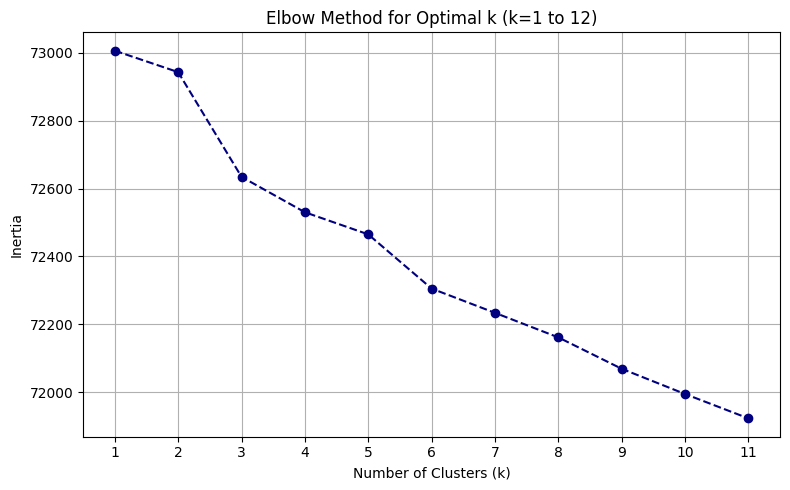

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fit the TF-IDF vectorizer only once
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['short_description_clean'])

# Store inertia values
inertias = []

# Define k range from 1 to 12
k_values = range(1, 12)
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')  # 'n_init=auto' is safe for sklearn >=1.2
    km.fit(X)
    inertias.append(km.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o', linestyle='--', color='navy')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (k=1 to 12)')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
df

,link,headline,category,short_description,authors,date,short_description_clean,cluster
0,https://www.huffpost.com/entry/twitch-streamer...,Twitch Bans Gambling Sites After Streamer Scam...,TECH,One man's claims that he scammed people on the...,Ben Blanchet,2022-09-21,one man claim scammed people platform caused s...,3
1,https://www.huffpost.com/entry/dodgers-basebal...,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS,"Maury Wills, who helped the Los Angeles Dodger...","Beth Harris, AP",2022-09-20,maury will helped los angeles dodger win three...,1
2,https://www.huffpost.com/entry/ukraine-festiva...,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,Jonathan Nicholson,2022-09-19,annual celebration took different feel russia ...,1
3,https://www.huffpost.com/entry/2022-wnba-final...,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS,Las Vegas never had a professional sports cham...,"Pat Eaton-Robb, AP",2022-09-19,la vega never professional sport champion — su...,1
4,https://www.huffpost.com/entry/james-cameron-f...,James Cameron Says He 'Clashed' With Studio Be...,ENTERTAINMENT,"The ""Avatar"" director said aspects of his 2009...",Ben Blanchet,2022-09-18,avatar director said aspect movie still compet...,1
...,...,...,...,...,...,...,...,...
73590,https://www.cnn.com/2025/04/29/science/first-d...,First image from the world’s largest solar tel...,SCIENCE,The National Science Foundation’s Daniel K. In...,Kameryn Griesser,2025-04-30,national science foundation’s daniel k inouye ...,1
73591,https://phys.org/news/2025-04-giant-croc-carni...,Giant croc-like carnivore fossils found in the...,SCIENCE,Imagine a crocodile built like a greyhound—tha...,Florida Museum of Natural History,2025-04-29,imagine crocodile built like greyhound—thats s...,1
73592,https://www.space.com/space-exploration/launch...,See photos snapped in space by Europe's 1st pr...,SCIENCE,"""This flight — and the engineering process tha...",Mike Wall,2025-04-29,flight — engineering process led u — taught u ...,1
73593,https://gizmodo.com/scientists-discover-a-mass...,"Scientists Discover a Massive, Glowing Blob of...",SCIENCE,The molecular cloud is brimming with material ...,Passant Rabie,2025-04-29,molecular cloud brimming material could birth ...,8


In [50]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Create a sample DataFrame with 90k records
# df = pd.DataFrame({
#     'authors': np.random.randn(90000)  # Simulating a large number of random records
# })

# # Option 1: Regular Histogram with optimized bins
# plt.figure(figsize=(10, 6))
# plt.hist(df['authors'].dropna(), bins='auto', color='skyblue', edgecolor='black')
# plt.title('Histogram of authors (90k Records)', fontsize=16)
# plt.xlabel('Value', fontsize=14)
# plt.ylabel('Frequency', fontsize=14)
# plt.show()

# # Option 2: Log scale histogram
# plt.figure(figsize=(10, 6))
# plt.hist(df['authors'].dropna(), bins=50, color='salmon', edgecolor='black')
# plt.yscale('log')  # Logarithmic scale on y-axis
# plt.title('Histogram with Log Scale', fontsize=16)
# plt.xlabel('Value', fontsize=14)
# plt.ylabel('Log Frequency', fontsize=14)
# plt.show()

# # Option 3: KDE (Kernel Density Estimate) for smoother distribution visualization
# plt.figure(figsize=(10, 6))
# sns.kdeplot(df['authors'].dropna(), shade=True, color='purple')
# plt.title('KDE of authors (90k Records)', fontsize=16)
# plt.xlabel('Value', fontsize=14)
# plt.ylabel('Density', fontsize=14)
# plt.show()


***Sentiment Analysis***

In [51]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the 'short_description' column
# The lambda function handles non-null values correctly
conc=df['short_description_clean'].apply(lambda x: sia.polarity_scores(str(x)) if pd.notnull(x) else {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0})

# Expand sentiment scores into separate columns
sentiment_df = pd.json_normalize(conc)

# Merge sentiment columns back to the original dataframe
df = pd.concat([df, sentiment_df], axis=1)

# Check if any NaN values exist in sentiment columns
print(df[['neg', 'neu', 'pos', 'compound']].isnull().sum())  # This should print 0 for all columns if no NaN values

# View the dataframe to ensure all sentiment values are mapped correctly
print(df.head())


neg         0
neu         0
pos         0
compound    0
dtype: int64
                                                link  \
0  https://www.huffpost.com/entry/twitch-streamer...   
1  https://www.huffpost.com/entry/dodgers-basebal...   
2  https://www.huffpost.com/entry/ukraine-festiva...   
3  https://www.huffpost.com/entry/2022-wnba-final...   
4  https://www.huffpost.com/entry/james-cameron-f...   

                                            headline       category  \
0  Twitch Bans Gambling Sites After Streamer Scam...           TECH   
1  Maury Wills, Base-Stealing Shortstop For Dodge...         SPORTS   
2  ‘Beautiful And Sad At The Same Time’: Ukrainia...       POLITICS   
3  Las Vegas Aces Win First WNBA Title, Chelsea G...         SPORTS   
4  James Cameron Says He 'Clashed' With Studio Be...  ENTERTAINMENT   

                                   short_description             authors  \
0  One man's claims that he scammed people on the...        Ben Blanchet   
1  Maury Wills,

In [52]:
df

,link,headline,category,short_description,authors,date,short_description_clean,cluster,neg,neu,pos,compound
0,https://www.huffpost.com/entry/twitch-streamer...,Twitch Bans Gambling Sites After Streamer Scam...,TECH,One man's claims that he scammed people on the...,Ben Blanchet,2022-09-21,one man claim scammed people platform caused s...,3,0.143,0.683,0.174,0.1280
1,https://www.huffpost.com/entry/dodgers-basebal...,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS,"Maury Wills, who helped the Los Angeles Dodger...","Beth Harris, AP",2022-09-20,maury will helped los angeles dodger win three...,1,0.186,0.619,0.196,0.0516
2,https://www.huffpost.com/entry/ukraine-festiva...,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,Jonathan Nicholson,2022-09-19,annual celebration took different feel russia ...,1,0.130,0.870,0.000,-0.0516
3,https://www.huffpost.com/entry/2022-wnba-final...,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS,Las Vegas never had a professional sports cham...,"Pat Eaton-Robb, AP",2022-09-19,la vega never professional sport champion — su...,1,0.344,0.656,0.000,-0.4847
4,https://www.huffpost.com/entry/james-cameron-f...,James Cameron Says He 'Clashed' With Studio Be...,ENTERTAINMENT,"The ""Avatar"" director said aspects of his 2009...",Ben Blanchet,2022-09-18,avatar director said aspect movie still compet...,1,0.000,0.841,0.159,0.1779
...,...,...,...,...,...,...,...,...,...,...,...,...
73590,https://www.cnn.com/2025/04/29/science/first-d...,First image from the world’s largest solar tel...,SCIENCE,The National Science Foundation’s Daniel K. In...,Kameryn Griesser,2025-04-30,national science foundation’s daniel k inouye ...,1,0.000,1.000,0.000,0.0000
73591,https://phys.org/news/2025-04-giant-croc-carni...,Giant croc-like carnivore fossils found in the...,SCIENCE,Imagine a crocodile built like a greyhound—tha...,Florida Museum of Natural History,2025-04-29,imagine crocodile built like greyhound—thats s...,1,0.000,0.837,0.163,0.5106
73592,https://www.space.com/space-exploration/launch...,See photos snapped in space by Europe's 1st pr...,SCIENCE,"""This flight — and the engineering process tha...",Mike Wall,2025-04-29,flight — engineering process led u — taught u ...,1,0.000,0.763,0.237,0.4767
73593,https://gizmodo.com/scientists-discover-a-mass...,"Scientists Discover a Massive, Glowing Blob of...",SCIENCE,The molecular cloud is brimming with material ...,Passant Rabie,2025-04-29,molecular cloud brimming material could birth ...,8,0.000,1.000,0.000,0.0000


In [53]:
df['cluster'].unique()

array([ 3,  1,  4,  8, 10,  6,  5,  7,  2,  9,  0], dtype=int32)

In [54]:
df

,link,headline,category,short_description,authors,date,short_description_clean,cluster,neg,neu,pos,compound
0,https://www.huffpost.com/entry/twitch-streamer...,Twitch Bans Gambling Sites After Streamer Scam...,TECH,One man's claims that he scammed people on the...,Ben Blanchet,2022-09-21,one man claim scammed people platform caused s...,3,0.143,0.683,0.174,0.1280
1,https://www.huffpost.com/entry/dodgers-basebal...,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS,"Maury Wills, who helped the Los Angeles Dodger...","Beth Harris, AP",2022-09-20,maury will helped los angeles dodger win three...,1,0.186,0.619,0.196,0.0516
2,https://www.huffpost.com/entry/ukraine-festiva...,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,Jonathan Nicholson,2022-09-19,annual celebration took different feel russia ...,1,0.130,0.870,0.000,-0.0516
3,https://www.huffpost.com/entry/2022-wnba-final...,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS,Las Vegas never had a professional sports cham...,"Pat Eaton-Robb, AP",2022-09-19,la vega never professional sport champion — su...,1,0.344,0.656,0.000,-0.4847
4,https://www.huffpost.com/entry/james-cameron-f...,James Cameron Says He 'Clashed' With Studio Be...,ENTERTAINMENT,"The ""Avatar"" director said aspects of his 2009...",Ben Blanchet,2022-09-18,avatar director said aspect movie still compet...,1,0.000,0.841,0.159,0.1779
...,...,...,...,...,...,...,...,...,...,...,...,...
73590,https://www.cnn.com/2025/04/29/science/first-d...,First image from the world’s largest solar tel...,SCIENCE,The National Science Foundation’s Daniel K. In...,Kameryn Griesser,2025-04-30,national science foundation’s daniel k inouye ...,1,0.000,1.000,0.000,0.0000
73591,https://phys.org/news/2025-04-giant-croc-carni...,Giant croc-like carnivore fossils found in the...,SCIENCE,Imagine a crocodile built like a greyhound—tha...,Florida Museum of Natural History,2025-04-29,imagine crocodile built like greyhound—thats s...,1,0.000,0.837,0.163,0.5106
73592,https://www.space.com/space-exploration/launch...,See photos snapped in space by Europe's 1st pr...,SCIENCE,"""This flight — and the engineering process tha...",Mike Wall,2025-04-29,flight — engineering process led u — taught u ...,1,0.000,0.763,0.237,0.4767
73593,https://gizmodo.com/scientists-discover-a-mass...,"Scientists Discover a Massive, Glowing Blob of...",SCIENCE,The molecular cloud is brimming with material ...,Passant Rabie,2025-04-29,molecular cloud brimming material could birth ...,8,0.000,1.000,0.000,0.0000


In [55]:
import sqlalchemy  as sa
from sqlalchemy import create_engine
from sqlalchemy import text

load_dotenv()

host = os.getenv("RDS_host")
port = 3306
username ="project_admin"
password = os.getenv("RDS_password")
db = "news_data"

engine_string = f'mysql+pymysql://{username}:{password}@{host}:{port}/{db}'

engine = sa.create_engine(engine_string)




with engine.connect() as conn:
    conn.execute(text("DROP TABLE IF EXISTS Cleaned_news_data;"))
    conn.commit()


df.to_sql('Cleaned_news_data', con=engine, index=False, if_exists='append')
print("Data inserted successfully into MySQL database.")

Data inserted successfully into MySQL database.


In [56]:
df.to_csv('Cleaned_news_data.csv', index=False)